<a href="https://colab.research.google.com/github/milleniaizzanch/Coding-Orbit-Gen-Z/blob/main/PCA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = {'feature_1': [random.uniform(0, 1) for i in range(100)],
        'feature_2': [random.uniform(0, 1) for i in range(100)],
        'feature_3': [random.uniform(0, 1) for i in range(100)],
        'feature_4': [random.uniform(0, 1) for i in range(100)],
        'feature_5': [random.uniform(0, 1) for i in range(100)],
        'feature_6': [random.uniform(0, 1) for i in range(100)],
        'feature_7': [random.uniform(0, 1) for i in range(100)],
        'feature_8': [random.uniform(0, 1) for i in range(100)],
        'feature_9': [random.uniform(0, 1) for i in range(100)],
        'feature_10': [random.uniform(0, 1) for i in range(100)],
        'label': [random.choice(['A', 'B', 'C']) for i in range(100)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.170701,0.047420,0.828762,0.023599,0.083925,0.207638,0.537894,0.453411,0.375236,0.318450,C
1,0.704562,0.843723,0.236500,0.848253,0.337837,0.782428,0.751173,0.100324,0.962984,0.485648,B
2,0.580032,0.252694,0.607522,0.202812,0.386106,0.147625,0.659512,0.644733,0.026122,0.868149,A
3,0.316072,0.698693,0.312893,0.025115,0.808035,0.477206,0.727183,0.968242,0.845984,0.667915,A
4,0.099686,0.152043,0.604472,0.774053,0.026030,0.985235,0.354170,0.686042,0.059604,0.966719,C


In [2]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
x = df.loc[:, features].values

In [3]:
y = df.loc[:,['label']].values

In [4]:
pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.170701,0.047420,0.828762,0.023599,0.083925,0.207638,0.537894,0.453411,0.375236,0.318450
1,0.704562,0.843723,0.236500,0.848253,0.337837,0.782428,0.751173,0.100324,0.962984,0.485648
2,0.580032,0.252694,0.607522,0.202812,0.386106,0.147625,0.659512,0.644733,0.026122,0.868149
3,0.316072,0.698693,0.312893,0.025115,0.808035,0.477206,0.727183,0.968242,0.845984,0.667915
4,0.099686,0.152043,0.604472,0.774053,0.026030,0.985235,0.354170,0.686042,0.059604,0.966719


In [5]:
pca = PCA(n_components=2)

In [6]:
principalComponents = pca.fit_transform(x)

In [7]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [8]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.400276,-0.332403
1,-0.556804,0.376592
2,0.149812,-0.592421
3,0.096090,0.257141
4,-0.034895,-0.451587


In [9]:
df[['label']].head()

,label
0,C
1,B
2,A
3,A
4,C


In [10]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,0.400276,-0.332403,C
1,-0.556804,0.376592,B
2,0.149812,-0.592421,A
3,0.096090,0.257141,A
4,-0.034895,-0.451587,C


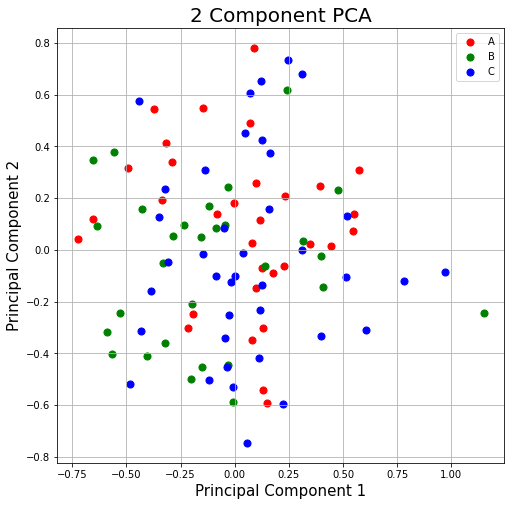

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()